In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("api_data_aadhar_enrolment/api_data_aadhar_enrolment_0_500000.csv")
df2 = pd.read_csv("api_data_aadhar_enrolment/api_data_aadhar_enrolment_1000000_1006029.csv")
df3 = pd.read_csv("api_data_aadhar_enrolment/api_data_aadhar_enrolment_500000_1000000.csv")


In [3]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [4]:
len(df)

1006029

In [5]:
df.value_counts()

date        state           district        pincode  age_0_5  age_5_17  age_18_greater
11-11-2025  Kerala          Thrissur        680552   1        0         0                 2
13-10-2025  Tamil Nadu      Villupuram      606208   1        0         0                 2
19-10-2025  Madhya Pradesh  Agar Malwa      465445   2        1         0                 2
13-10-2025  Tamil Nadu      Villupuram      606402   3        0         0                 2
19-10-2025  Madhya Pradesh  Agar Malwa      465230   3        2         0                 2
                                                                                         ..
13-09-2025  Rajasthan       Udaipur         313902   1        2         0                 1
                                            313903   4        0         0                 1
                                            313904   1        0         0                 1
                                            313905   2        3         0            

In [6]:
df.isna().sum()

date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

In [7]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

In [8]:
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21


In [9]:
df['total_enrolment'] = df['age_0_5'] + df['age_5_17'] + df['age_18_greater']

In [10]:
print(f"Dataset Loaded. Total Rows: {df.shape[0]}")

Dataset Loaded. Total Rows: 1006029


In [10]:
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrolment
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,109
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39,86
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,123
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,106
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21,51


In [11]:
df.to_csv('Adhaar_enrolment')

In [12]:
temporal_df = df.groupby('date')['total_enrolment'].sum().reset_index()

In [13]:
temporal_df.head()

,date,total_enrolment
0,2025-03-02,109
1,2025-03-09,3404
2,2025-03-15,3102
3,2025-03-20,6218
4,2025-03-23,576


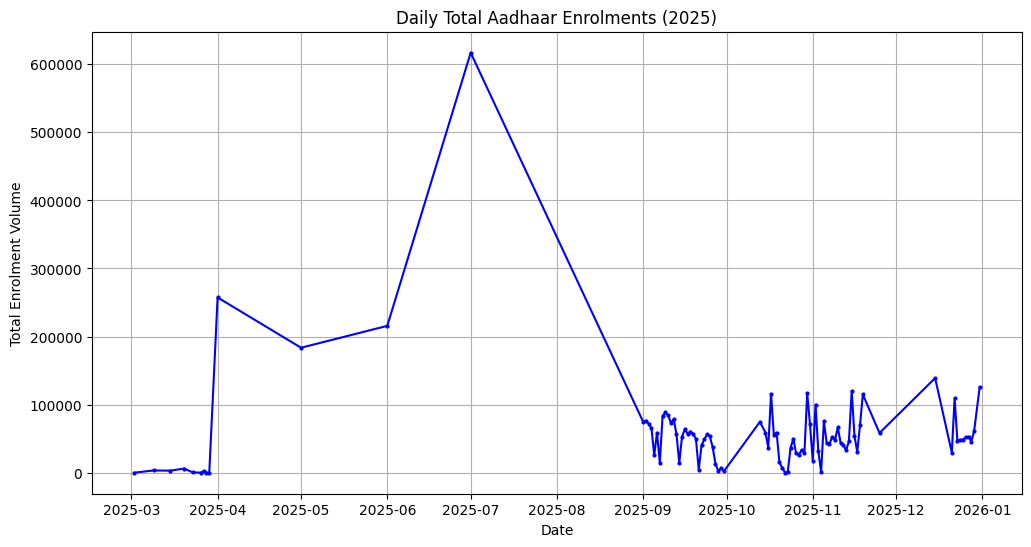

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(temporal_df['date'], temporal_df['total_enrolment'], marker='o', color='b', markersize=2)
plt.title('Daily Total Aadhaar Enrolments (2025)')
plt.xlabel('Date')
plt.ylabel('Total Enrolment Volume')
plt.grid(True)
plt.savefig('temporal_trends.png')

/var/folders/zv/n_w2gt8n32l8wmwk5lylj1b40000gn/T/ipykernel_96855/1520990554.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_df.head(15), x='total_enrolment', y='state', palette='magma')


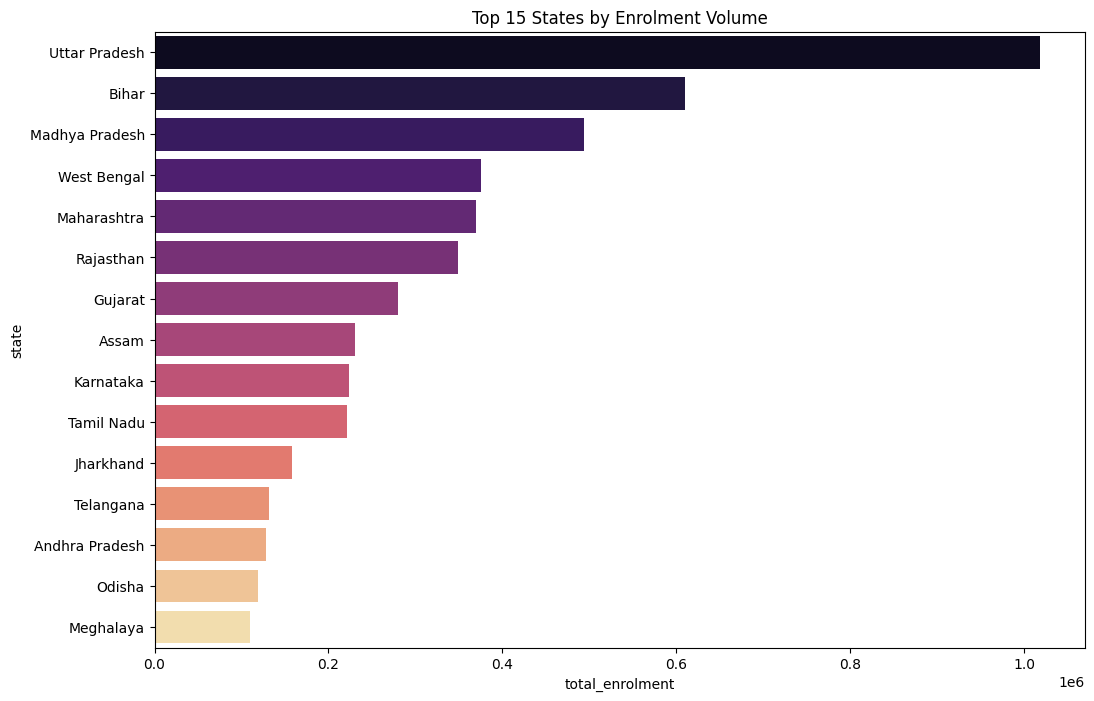

In [15]:
# B. State-wise Distribution: Identify high-activity regions
state_df = df.groupby('state')['total_enrolment'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(data=state_df.head(15), x='total_enrolment', y='state', palette='magma')
plt.title('Top 15 States by Enrolment Volume')
plt.savefig('state_distribution.png')

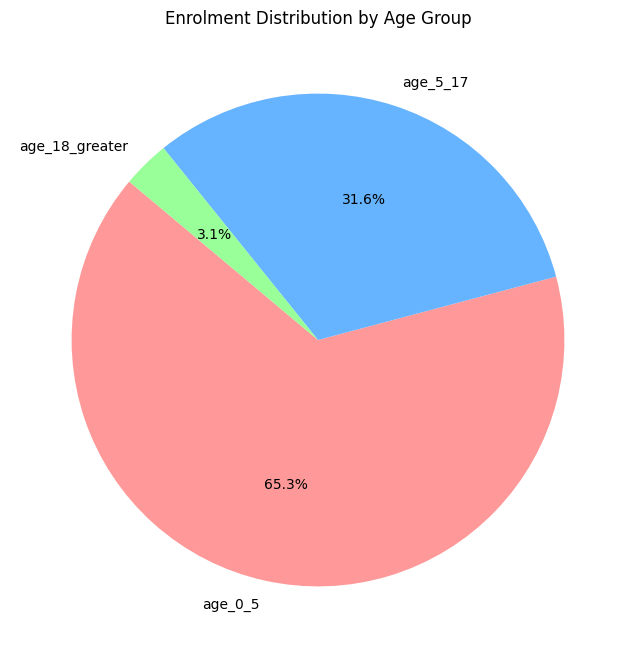

In [16]:
# C. Age Group Distribution: Understand the user profile
age_sums = df[['age_0_5', 'age_5_17', 'age_18_greater']].sum()
plt.figure(figsize=(8, 8))
plt.pie(age_sums, labels=age_sums.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Enrolment Distribution by Age Group')
plt.savefig('age_distribution.png')

In [55]:
# Step 1: Calculate historical mean and std dev for each Pincode
pincode_stats = df.groupby('pincode')['total_enrolment'].agg(['mean', 'std']).reset_index()

# Step 2: Merge stats back to the main dataframe
df_copy = df.merge(pincode_stats, on='pincode', how='left')

# Step 3: Calculate Z-Score (The Risk Score)
# We handle cases with 0 std dev to avoid division by zero
df_copy['z_score'] = (df_copy['total_enrolment'] - df_copy['mean']) / df_copy['std'].replace(0, np.nan)

# Step 4: Identify High Risk Points (Z-score > 3 is a standard anomaly threshold)
high_risk_points = df_copy[df_copy['z_score'] > 3].sort_values(by='z_score', ascending=False)

# Export the results for your AI model
high_risk_points.to_csv('high_risk_points_analysis.csv', index=False)
df_copy.to_csv('processed_aadhar_data.csv', index=False)

print(f"Risk Engine identified {len(high_risk_points)} anomaly points.")
print(high_risk_points[['date', 'state', 'pincode', 'total_enrolment', 'z_score']].head(10))

Risk Engine identified 18365 anomaly points.
           date           state  pincode  total_enrolment    z_score
3244 2025-07-01           DELHI   110053             1608  14.644873
3213 2025-07-01     MAHARASHTRA   431001             3835  14.243991
3266 2025-07-01     WEST BENGAL   743329             1418  14.217468
2467 2025-07-01       JHARKHAND   831002              769  14.202528
3262 2025-07-01       JHARKHAND   831012              362  13.820061
2890 2025-07-01  MADHYA PRADESH   450661              458  13.375534
2097 2025-06-01     WEST BENGAL   735211              224  13.306233
3205 2025-07-01     WEST BENGAL   736121              376  13.218189
2968 2025-07-01     MAHARASHTRA   400078              483  13.176788
330  2025-04-01      TAMIL NADU   600100              214  13.151349


In [19]:
df_risk.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrolment,mean,std,z_score
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,109,76.666667,250.979602,0.128829
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39,86,19.624113,78.381260,0.846834
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,123,49.113475,187.251858,0.394584
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,106,28.486842,141.779688,0.546716
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21,51,13.691729,54.961582,0.678806


In [25]:
df = df[~df["state"].str.fullmatch(r"\d+")]


In [28]:
import re

def clean_state(state):
    state = str(state)                  # ensure string
    state = state.upper()               # ALL CAPS
    state = state.replace("&", "AND")   # replace symbol
    state = re.sub(r"[^A-Z ]", "", state)  # remove everything except letters and space
    state = re.sub(r"\s+", " ", state)  # collapse multiple spaces
    return state.strip()


In [50]:
import pandas as pd

# Aggregate total enrollment by state
state_enrollment = (
    df.groupby("state")["total_enrolment"]
    .sum()
    .reset_index()
)


In [49]:
state_fix_map = {
    "DAMAN AND DIU": "DADRA AND NAGAR HAVELI AND DAMAN AND DIU",
    "DADRA AND NAGAR HAVELI":"DADRA AND NAGAR HAVELI AND DAMAN AND DIU",
    "ORISSA	": "ODISSA",
    "PUDUCHERRY	": "PONDICHERRY	",
    "WESTBENGAL": "WEST BENGAL",
    "WEST BANGAL": "WEST BENGAL",
    "WEST BENGAL": "WEST BENGAL",
    "THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU": 
        "DADRA AND NAGAR HAVELI AND DAMAN AND DIU"
}

df["state"] = df["state"].replace(state_fix_map)


In [31]:
df = df.copy()
df["state"] = df["state"].apply(clean_state)



In [40]:
df = df.rename(columns={"THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU": "DADAR AND NAGAR HAVELI AND DAMAN AND DIU"})


In [51]:
state_enrollment

,state,total_enrolment
0,ANDAMAN AND NICOBAR ISLANDS,511
1,ANDHRA PRADESH,127686
2,ARUNACHAL PRADESH,4344
3,ASSAM,230197
4,BIHAR,609585
5,CHANDIGARH,2723
6,CHHATTISGARH,103219
7,DADRA AND NAGAR HAVELI AND DAMAN AND DIU,1799
8,DELHI,94529
9,GOA,2333


In [22]:
state_enrollment[state_enrollment["state"].apply(lambda x: isinstance(x, (int, float)))]


,state,total_enrolment


In [23]:
df["state"].apply(type).value_counts()


state
<class 'str'>    1006029
Name: count, dtype: int64

In [24]:
state_enrollment[state_enrollment["state"] == "100000"]


,state,total_enrolment
0,100000,218


In [35]:
import pandas as pd

# Load Aadhaar enrollment data

# Aggregate total enrollment by state
state_enrollment = (
    df.groupby("state")["total_enrolment"]
    .sum()
    .reset_index()
)


In [68]:
df['YearMonth'] = df['date'].dt.to_period('M')
monthly_trend = df.groupby('YearMonth')['total_enrolment'].sum()


In [52]:
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrolment
0,2025-03-02,MEGHALAYA,East Khasi Hills,793121,11,61,37,109
1,2025-03-09,KARNATAKA,Bengaluru Urban,560043,14,33,39,86
2,2025-03-09,UTTAR PRADESH,Kanpur Nagar,208001,29,82,12,123
3,2025-03-09,UTTAR PRADESH,Aligarh,202133,62,29,15,106
4,2025-03-09,KARNATAKA,Bengaluru Urban,560016,14,16,21,51


In [56]:
# Calculate 7-day rolling mean for each state
df_copy1 = df_copy.sort_values(['state', 'date'])
df_copy1['rolling_mean'] = df_copy1.groupby('state')['total_enrolment'].transform(lambda x: x.rolling(window=7).mean())

# Calculate Velocity (Current vs Average)
df_copy1['velocity_score'] = df_copy1['total_enrolment'] / df_copy1['rolling_mean']

# Identify "Burst" points (Velocity > 2 means double the usual volume)
burst_risks = df_copy1[df_copy1['velocity_score'] > 2]

print("Top Burst Risk Points:")
print(burst_risks[['date', 'state', 'district', 'velocity_score']].sort_values(by='velocity_score', ascending=False).head(10))

Top Burst Risk Points:
             date              state                  district  velocity_score
983226 2025-12-29  JAMMU AND KASHMIR                      Doda        6.568282
918913 2025-12-24          MEGHALAYA  Eastern West Khasi Hills        6.483871
735897 2025-11-13          RAJASTHAN                   Jodhpur        6.320388
140997 2025-09-10        WEST BENGAL            Uttar Dinajpur        6.285714
929437 2025-12-25          MEGHALAYA  Eastern West Khasi Hills        6.274510
987725 2025-12-29        WEST BENGAL         South 24 Parganas        6.267974
980687 2025-12-29          KARNATAKA                 Davangere        6.222222
653326 2025-11-07              ASSAM                   Barpeta        6.222222
110985 2025-09-09        WEST BENGAL            Uttar Dinajpur        6.214953
273766 2025-09-20         TAMIL NADU                  Namakkal        6.212500


In [89]:
df_risk.to_csv('aadhar_risk_features.csv')

In [68]:
df_copy1.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrolment,mean,std,z_score,rolling_mean,velocity_score,child_adult_ratio,adult_enrolment_risk
4928,2025-09-01,ANDAMAN AND NICOBAR ISLANDS,Nicobar,744304,1,0,0,1,1.000000,NaN,NaN,NaN,0.0,10.0,False
4929,2025-09-01,ANDAMAN AND NICOBAR ISLANDS,South Andaman,744107,1,0,0,1,1.000000,0.000000,NaN,NaN,0.0,10.0,False
8134,2025-09-01,ANDAMAN AND NICOBAR ISLANDS,Andamans,744101,0,1,0,1,1.222222,0.423659,-0.524531,NaN,0.0,0.0,True
8135,2025-09-01,ANDAMAN AND NICOBAR ISLANDS,South Andaman,744105,1,0,0,1,1.266667,0.482461,-0.552722,NaN,0.0,10.0,False
8136,2025-09-01,ANDAMAN AND NICOBAR ISLANDS,Nicobar,744301,9,2,0,11,2.193548,1.973480,4.462397,NaN,0.0,90.0,False


In [57]:
import pandas as pd

# Load your data
df_risk = df_copy1

# 1. Calculate the Ratio
# We add 0.1 to handle cases where 'age_18_greater' is 0
df_risk['child_adult_ratio'] = df_risk['age_0_5'] / (df_risk['age_18_greater'] + 0.1)

# 2. Identify Anomalies
# Calculate the global average ratio as a baseline
average_ratio = df_risk['child_adult_ratio'].mean()

# Flag rows where the ratio is significantly higher or lower than the average
# Example: Flag if adult enrolments are unusually high (Ratio becomes very small)
df_risk['adult_enrolment_risk'] = df_risk['child_adult_ratio'] < (average_ratio / 10)

print(f"Global Average Child-Adult Ratio: {average_ratio:.2f}")
print(df_risk[['state', 'district', 'child_adult_ratio']].head())

Global Average Child-Adult Ratio: 27.34
                            state       district  child_adult_ratio
4928  ANDAMAN AND NICOBAR ISLANDS        Nicobar               10.0
4929  ANDAMAN AND NICOBAR ISLANDS  South Andaman               10.0
8134  ANDAMAN AND NICOBAR ISLANDS       Andamans                0.0
8135  ANDAMAN AND NICOBAR ISLANDS  South Andaman               10.0
8136  ANDAMAN AND NICOBAR ISLANDS        Nicobar               90.0


In [58]:
import xgboost as xgb
import shap
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Prepare Training Data
# We define 'High Risk' as rows where Z-score > 3 OR Velocity > 3
data = pd.read_csv('aadhar_risk_features.csv')
data['is_risk'] = ((data['z_score'] > 3) | (data['velocity_score'] > 3)).astype(int)

# Features for the model
X = data[['total_enrolment', 'velocity_score', 'child_adult_ratio']]
y = data['is_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train XGBoost Model
model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100)
model.fit(X_train, y_train)

# 3. The "Explainability" Layer (SHAP)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# 4. Generate a Risk Report for a single suspect transaction
# Let's pick the most risky row
suspect_idx = X_test.iloc[0:1] 
print(f"Risk Probability: {model.predict_proba(suspect_idx)[0][1] * 100:.2f}%")

# Generate the explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], suspect_idx)

Risk Probability: 0.09%


In [59]:
df_risk.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrolment,mean,std,z_score,rolling_mean,velocity_score,child_adult_ratio,adult_enrolment_risk
4928,2025-09-01,ANDAMAN AND NICOBAR ISLANDS,Nicobar,744304,1,0,0,1,1.000000,NaN,NaN,NaN,NaN,10.0,False
4929,2025-09-01,ANDAMAN AND NICOBAR ISLANDS,South Andaman,744107,1,0,0,1,1.000000,0.000000,NaN,NaN,NaN,10.0,False
8134,2025-09-01,ANDAMAN AND NICOBAR ISLANDS,Andamans,744101,0,1,0,1,1.222222,0.423659,-0.524531,NaN,NaN,0.0,True
8135,2025-09-01,ANDAMAN AND NICOBAR ISLANDS,South Andaman,744105,1,0,0,1,1.266667,0.482461,-0.552722,NaN,NaN,10.0,False
8136,2025-09-01,ANDAMAN AND NICOBAR ISLANDS,Nicobar,744301,9,2,0,11,2.193548,1.973480,4.462397,NaN,NaN,90.0,False


In [79]:
df_risk.to_csv('AdhaarRiskEnrolment')

In [64]:
df_copy1[df_copy1["velocity_score"].isna()][["pincode", "date", "total_enrolment"]].head()


,pincode,date,total_enrolment
4928,744304,2025-09-01,1
4929,744107,2025-09-01,1
8134,744101,2025-09-01,1
8135,744105,2025-09-01,1
8136,744301,2025-09-01,11


In [66]:
df_copy1["velocity_score"] = df_copy1["velocity_score"].fillna(0)

In [67]:
df_copy1[df_copy1["velocity_score"].isna()][["pincode", "date", "total_enrolment"]].head()

,pincode,date,total_enrolment


In [69]:
import numpy as np

# Safety
df = df_copy1.copy()

# Fill NaNs safely
df["velocity_score"] = df["velocity_score"].fillna(0)
df["z_score"] = df["z_score"].fillna(0)

# Clip extreme outliers (important)
df["velocity_score"] = df["velocity_score"].clip(-10, 10)
df["z_score"] = df["z_score"].clip(-10, 10)


In [70]:
from scipy.special import expit  # sigmoid

df["volume_risk"] = expit(
    (df["total_enrolment"] - df["total_enrolment"].median())
    / df["total_enrolment"].std()
)

df["velocity_risk"] = expit(df["velocity_score"])
df["zscore_risk"] = expit(df["z_score"])


In [71]:
df["risk_score"] = (
    0.4 * df["velocity_risk"] +
    0.4 * df["zscore_risk"] +
    0.2 * df["volume_risk"]
) * 100


In [72]:
def classify_risk(score):
    if score >= 80:
        return "HIGH"
    elif score >= 50:
        return "MEDIUM"
    else:
        return "LOW"

df["risk_level"] = df["risk_score"].apply(classify_risk)


In [73]:
def risk_reason(row):
    reasons = []
    if row["velocity_risk"] > 0.7:
        reasons.append("HIGH VELOCITY SPIKE")
    if row["zscore_risk"] > 0.7:
        reasons.append("STATISTICAL ANOMALY")
    if row["volume_risk"] > 0.7:
        reasons.append("UNUSUALLY HIGH VOLUME")
    return ", ".join(reasons)

df["risk_reason"] = df.apply(risk_reason, axis=1)
